# Visualize common GCAM and Demeter run data


## Load packages

**NOTE**:  You need to install `im3vis` which is the package in this repo.  You can do this by running:

```py
python setup.py install
``` 
from the directory you cloned `im3vis` to.

In [1]:
%matplotlib inline

import os
import pkg_resources

import im3vis
import pandas as pd
import geopandas as gpd
import seaborn as sns; sns.set()


## Setup paths to data and other info

In [2]:
# target year you wish to examine
target_year = '2015'

# bounary shapefile for the CONUS loaded as a geopandas dataframe
conus_boundary_gdf = gpd.read_file(pkg_resources.resource_filename('im3vis', "data/ne_50m_conus.shp"))

# a Pandas data frame of GCAM's projected land allocation data
gcam_df = pd.read_pickle('/Users/d3y010/Desktop/demeter_data/gcam_df.pkl')

# read in data as a pandas data frame
demeter_df = pd.read_csv('/Users/d3y010/Desktop/demeter_data/demeter_2015.csv')

# a geopandas data frame of demeter's output land allocation data with geometry
demeter_gdf = im3vis.build_geodataframe(demeter_df)


## GCAM total land allocation by region for all land classes

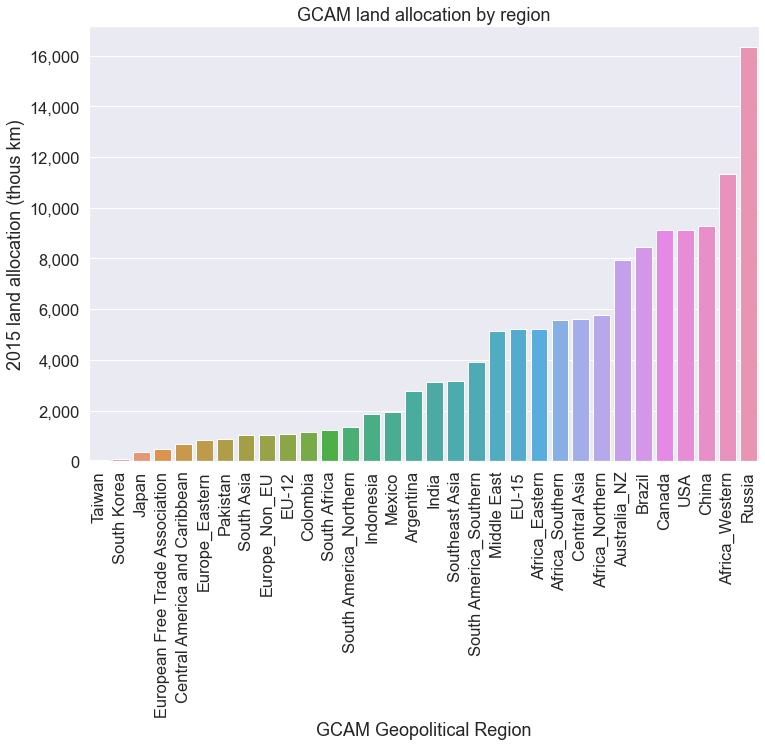

In [3]:
reg_ax = im3vis.gcam_demeter_region(gcam_df, target_year)

## GCAM total land allocation by region for combined Corn

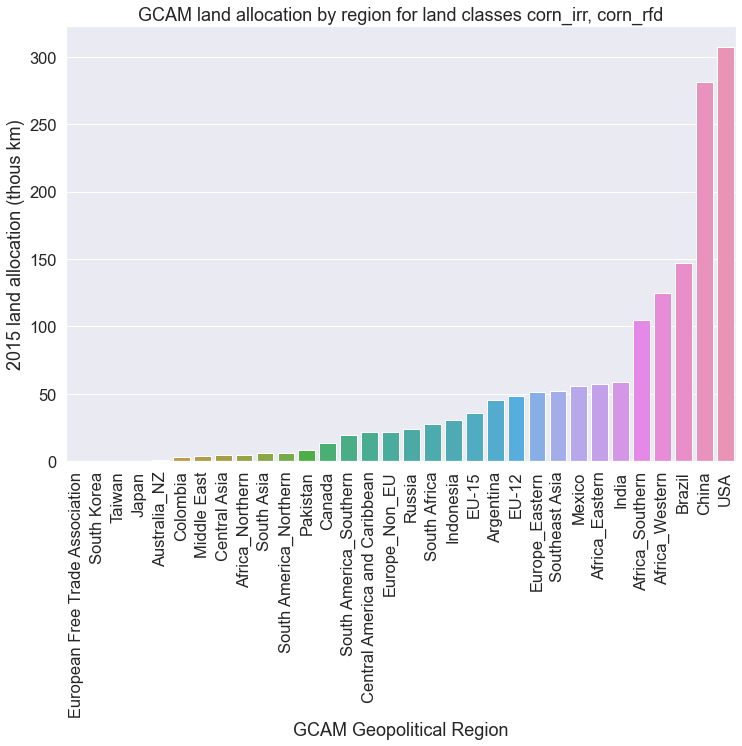

In [3]:
reg_ax = im3vis.gcam_demeter_region(gcam_df, target_year, landclass_list=['corn_irr', 'corn_rfd'])

## GCAM `corn` allocation for year 2015 for the CONUS

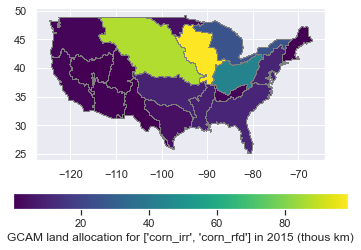

In [3]:
agg_df = im3vis.plot_gcam_basin(gcam_df,
                                      target_year, 
                                      landclass_list=['corn_irr', 'corn_rfd'], 
                                      setting='crop_yield',
                                      scope='conus')


## GCAM 'corn` allocation for year 2020 for all global basins


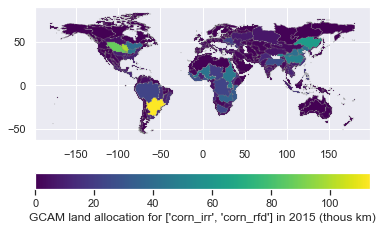

In [4]:
agg_df = im3vis.plot_gcam_basin(gcam_df,
                                      target_year,
                                      landclass_list=['corn_irr', 'corn_rfd'],
                                      setting='crop_yield',
                                      scope='global')


## Demeter `corn` output for year 2015 for the CONUS

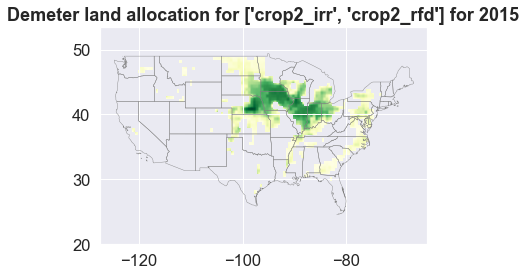

In [6]:
r = im3vis.plot_demeter_raster(conus_boundary_gdf, 
                               demeter_gdf, 
                               landclass_list=['crop2_irr', 'crop2_rfd'],
                               target_year=target_year, 
                               scope='conus',
                               resolution='0.5')


## Demeter `forest` global output for year 2015

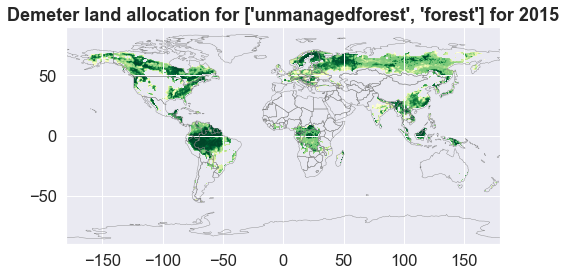

In [7]:
r = im3vis.plot_demeter_raster(conus_boundary_gdf, 
                               demeter_gdf, 
                               landclass_list=['unmanagedforest', 'forest'],
                               target_year=target_year, 
                               scope='global',
                               resolution='0.5')
